In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
folder = r'C:\Users\kasiditp\Desktop\datasets'
file_names = [i for i in os.listdir(r'C:\Users\kasiditp\Desktop\datasets') if i.startswith('Binance')]
file_names

['Binance_BTCUSDT_d.csv', 'Binance_BTCUSDT_minute.csv']

In [7]:
df = pd.read_csv(os.path.join(folder,'Binance_BTCUSDT_minute.csv'),skiprows=1)

In [8]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1643076300000,2022-01-25 02:05:00,BTC/USDT,36125.54,36128.30,36088.68,36123.04,24.13664,8.716604e+05,946
1,1643076240000,2022-01-25 02:04:00,BTC/USDT,36086.81,36149.36,36086.81,36128.30,17.30623,6.251052e+05,790
2,1643076180000,2022-01-25 02:03:00,BTC/USDT,36115.20,36133.11,36084.85,36086.82,71.93752,2.598142e+06,1363
3,1643076120000,2022-01-25 02:02:00,BTC/USDT,36134.20,36148.86,36113.07,36115.20,52.04091,1.880093e+06,1216
4,1643076060000,2022-01-25 02:01:00,BTC/USDT,36115.82,36149.79,36102.86,36137.74,20.34114,7.348412e+05,635


In [9]:
df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USDT', 'tradecount'],
      dtype='object')

In [11]:
#reorder date
df = df.sort_values(by = ['date'])

In [27]:
df.date = pd.to_datetime(df.date )

In [28]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1246439,1567965420000,2019-09-08 17:57:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.001,10.0,1
1246438,1567965480000,2019-09-08 17:58:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0
1246437,1567965540000,2019-09-08 17:59:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.001,10.0,1
1246436,1567965600000,2019-09-08 18:00:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0
1246435,1567965660000,2019-09-08 18:01:00,BTC/USDT,10000.0,10000.0,10000.0,10000.0,0.000,0.0,0


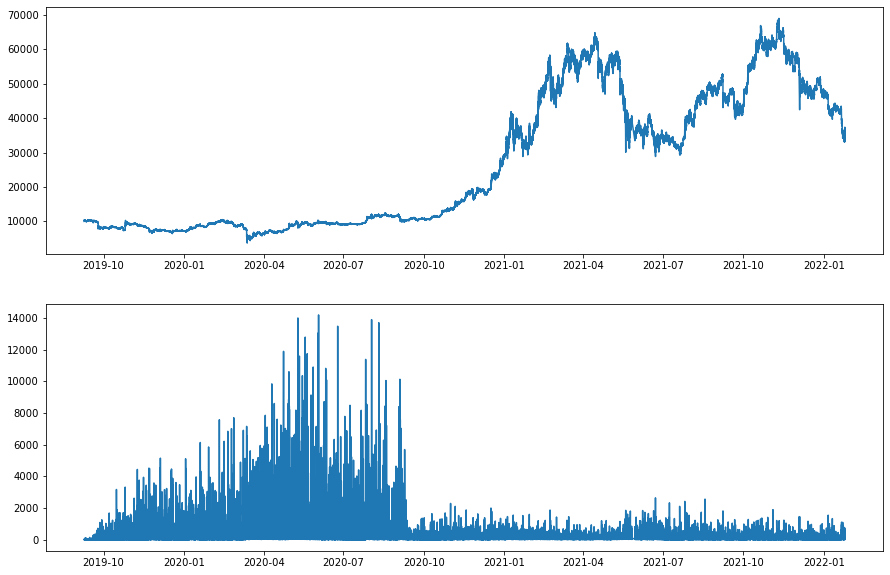

In [33]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax[0].plot(df['date'], df['open'])
ax[1].plot(df['date'], df['Volume BTC'])

In [39]:
df['open_shf'] = df['open'].shift(-1)

In [41]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,open_shf
4,1643076060000,2022-01-25 02:01:00,BTC/USDT,36115.82,36149.79,36102.86,36137.74,20.34114,7.348412e+05,635,36134.20
3,1643076120000,2022-01-25 02:02:00,BTC/USDT,36134.20,36148.86,36113.07,36115.20,52.04091,1.880093e+06,1216,36115.20
2,1643076180000,2022-01-25 02:03:00,BTC/USDT,36115.20,36133.11,36084.85,36086.82,71.93752,2.598142e+06,1363,36086.81
1,1643076240000,2022-01-25 02:04:00,BTC/USDT,36086.81,36149.36,36086.81,36128.30,17.30623,6.251052e+05,790,36125.54
0,1643076300000,2022-01-25 02:05:00,BTC/USDT,36125.54,36128.30,36088.68,36123.04,24.13664,8.716604e+05,946,NaN


In [46]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df['open'].values.reshape(-1,1))
y = scaler.fit_transform(df['open_shf'].values.reshape(-1,1))

In [56]:
#split train and test
training_size = int(0.8*len(X))
X_train = X[:training_size]
y_train = y[:training_size]
X_test = X[training_size:]
y_test = y[training_size:]

In [58]:
X_train.shape

(997152, 1)

In [70]:
#LSTM
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout 
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape = (X_train.shape[0], 1)))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 997152, 50)        10400     
                                                                 
 dropout_1 (Dropout)         (None, 997152, 50)        0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,702
Trainable params: 30,702
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
31161/31161 [==============================] - 52s 2ms/step - loss: 3.5032e-04 - mean_absolute_error: 0.0086
Epoch 2/100
31161/31161 [==============================] - 67s 2ms/step - loss: 6.6899e-05 - mean_absolute_error: 0.0054
Epoch 3/100
31161/31161 [==============================] - 71s 2ms/step - loss: 4.0446e-05 - mean_absolute_error: 0.0042
Epoch 4/100
31161/31161 [==============================] - 69s 2ms/step - loss: 3.0478e-05 - mean_absolute_error: 0.0036
Epoch 5/100
31161/31161 [==============================] - 69s 2ms/step - loss: 2.6065e-05 - mean_absolute_error: 0.0033
Epoch 6/100
31161/31161 [==============================] - 69s 2ms/step - loss: 2.2214e-05 - mean_absolute_error: 0.0030
Epoch 7/100
31161/31161 [==============================] - 70s 2ms/step - loss: 1.9764e-05 - mean_absolute_error: 0.0029
Epoch 8/100
31161/31161 [==============================] - 69s 2ms/step - loss: 1.7884e-05 - mean_absolute_error: 0.0028
Epoch 9/100
31161/31161 [=======

In [79]:
model.save('./btc_model_01.h5')
# keras.models.load_model("path") for loading

In [76]:
y_pred = model.predict(X_test)

In [77]:
y_pred

array([[0.4947918 , 0.49479342],
       [0.49506527, 0.49506697],
       [0.49514383, 0.49514547],
       ...,
       [0.44450867, 0.44450998],
       [0.44409025, 0.4440916 ],
       [0.44466108, 0.4446624 ]], dtype=float32)

In [80]:
y_predict = scaler.inverse_transform(y_pred)

Text(0.5, 1.0, 'Bitcoin price prediction')

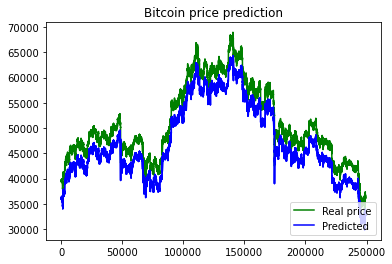

In [90]:
plt.figure()
plt.plot(scaler.inverse_transform(y_test),color='g')
plt.plot(y_predict,color='b')
plt.legend(["Real price", "Predicted"], loc ="lower right")
plt.title('Bitcoin price prediction')